### ***AUTHORS***
1. Kiprono Ben
2. Norman Mwapea
3. Pauline Kariuki
4. Wesley Owino
5. Judith Otieno
6. Alvin Kipleting

## BUSINESS UNDERSTANDING

### OVERVIEW

This is a Natural Language Processing (NLP)-driven sentiment analysis project designed to decode public opinion on two of the world’s most influential tech companies; **Apple** and **Google**. By leveraging machine learning techniques to analyze thousands of real tweets, the project aims to classify user sentiment as *positive*, *negative*, or *neutral*.  

This initiative demonstrates how social media analytics can provide actionable insights for companies seeking to understand consumer perceptions, monitor brand reputation, and anticipate market trends. Ultimately, the project serves as a prototype for a scalable, intelligent sentiment monitoring system applicable across industries.

### BACKGROUND

Social media has become the world’s largest real-time feedback loop. Millions of users share their thoughts daily about products, services, and brands; creating a goldmine of unstructured data that reveals how people truly feel.  
For technology companies like **Apple** and **Google**, such sentiment can directly influence *brand equity*, *purchase behavior*, and *public trust*. Tweets praising a product’s innovation or criticizing a software update can ripple across digital spaces, shaping collective opinion within hours.  
Understanding these emotional currents is therefore critical for modern businesses. Sentiment analysis transforms raw textual chatter into measurable, strategic insight—empowering companies to react faster, market smarter, and communicate better.

### OBJECTIVES

The main goals of the project are to:

1. Develop a Natural Language Processing (NLP) model that classifies tweets related to Apple and Google as *positive*, *negative*, or *neutral*.  
2. Preprocess and transform raw text into machine-readable features using tokenization, normalization, stopword removal, and TF-IDF vectorization.  
3. Evaluate multiple machine learning algorithms to identify the most accurate and interpretable classifier.  
4. Generate data-driven insights about brand sentiment patterns to support business and marketing decisions.  
5. Lay the groundwork for an automated brand intelligence system capable of tracking sentiment across multiple platforms and industries.

### SUCCESS METRICS

Success will be defined through a mix of technical and business outcomes:

- **Model Performance:** Achieving at least 80% F1-score across sentiment classes.  
- **Data Integrity:** Clean, balanced, and reproducible dataset suitable for future extensions.  
- **Interpretability:** Ability to visualize top sentiment-driving words and phrases for explainability.  
- **Insight Quality:** Sentiment trends that clearly reflect real-world brand perceptions.  
- **Scalability:** Modular design allowing future integration with streaming APIs for live monitoring.

### STAKEHOLDERS

The beneficiaries of this undertaking include:
  
- **Marketing Analysts:** Use sentiment insights to understand public opinion and campaign impact.  
- **Product Managers:** Monitor consumer feedback and sentiment shifts after product launches.  
- **Executives & Decision Makers:** Leverage findings to inform strategic brand and communication strategies.
- **Data Science & NLP Teams:** Responsible for model design, feature engineering, and evaluation.  
- **Research & Development Teams:** Explore applications of the model in broader domains like product reviews, customer feedback, and crisis management.

#### RELEVANCE

TechTones bridges the gap between data and perception. It shows how machine learning can turn the chaos of social media into structured intelligence; helping organizations not only track how people feel, but also why they feel that way.
This project highlights the growing role of NLP in business strategy, reputation management, and competitive intelligence, providing a strong proof of concept for sentiment analysis as a key driver of modern data-driven decision-making.

## DATA UNDERSTANDING
 
The dataset used in this project is sourced from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions) and contains over 9,000 Tweets referencing Apple and Google products. Each Tweet has been annotated with information identifying the product or brand mentioned and the emotion expressed toward it. It offers a real-world foundation for supervised sentiment analysis in Natural Language Processing (NLP). 

It contains the following features with their descriptions:

| Feature | Description |
|--------------|----------------|
| tweet_text | The full text of each Tweet referencing Apple or Google products. |
| emotion_in_tweet_is_directed_at | The product or brand mentioned (e.g iPhone, iPad, Google, iPad/iPhone App). |
| is_there_an_emotion_directed_at_a_brand_or_product | The annotated sentiment label -> *Positive emotion*, *Negative emotion*, or *No emotion toward brand or product*. |

This schema supports a supervised learning setup where tweet_text acts as the input feature and is_there_an_emotion_directed_at_a_brand_or_product serves as the target variable for classification.

Awesome! Now, let's get our hands dirty.

### EXPLORING THE DATA

We begin by loading the data and performing an initial exploration to get a sense of its structure and content. But first, we gather our essential tools; just as a painter readies their palette and brushes before creating a masterpiece.

In [61]:
# ======= [Import all relevant libraries] =======

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# String manipulation
import re

# NLP
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.tokenize import RegexpTokenizer                   # Tokenization
from nltk.corpus import stopwords                           # Stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer      # Stemming & Lemmatization

# Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Pipelines
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression         # Logistic Regression
from sklearn.tree import DecisionTreeClassifier             # Decision Tree

# ML Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    ConfusionMatrixDisplay, confusion_matrix,
    roc_curve, auc,
    classification_report
)

# Set column display to maximum
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\billm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\billm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\billm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Now we load the data.

In [62]:
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="ISO-8859-1")
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion toward brand or product


*Observation:* The dataset is consistent and admittedly very messy.

Then we check the number of records and fatures we are working with.

In [63]:
print(f"The dataset has {df.shape[0]} records and {df.shape[1]} features.")

The dataset has 9093 records and 3 features.


We’ve got over 9,000 records, a solid data haul. Let’s see how unique the dataset is.


In [64]:
# ======= [Dataset Uniqueness] =======

# Number of unique values in each column
print("Number of unique values in:", '\n')
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Unique values in each column
print("\nUnique Values in:")
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].unique())

Number of unique values in: 

tweet_text: 9065 unique values
emotion_in_tweet_is_directed_at: 9 unique values
is_there_an_emotion_directed_at_a_brand_or_product: 4 unique values

Unique Values in:

tweet_text:
['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.'
 ...
 "Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev"
 'Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.'
 '\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tes

*Observation:*

- There are over 9,065 unique tweet entries, meaning nearly every tweet in the dataset is distinct.
- These tweets are directed to 9 unique products, capturing a range of Apple and Google products (like iPhone, Android, iPad) and some general or unspecified mentions. The presence of NaN values suggests that some tweets don’t explicitly mention a product.
- There are 4 distinct emotional classifications, reflecting the sentiment intensity or clarity.

Based on this initial preview, it makes sense to standardize the column names; keeping them short, clear, and code friendly. We’ll rename them as follows:

In [65]:
# Rename the columns
df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
}, inplace=True)

# Preview new column names
df.columns

Index(['tweet', 'product', 'sentiment'], dtype='object')

We further check the metadata.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


*Interpretation:*

- All fields are categorical which is consistent with the data as it is in text format.
- tweet: Almost complete, with 9,092 non-null values, meaning only one missing entry.
- product: Has 3,291 non-null values, showing that about 36% of tweets mention a specific Apple or Google product. The rest are either general statements or lack a clear product reference.
- sentiment: Fully populated.

Next, we aim to deepen our understanding of the dataset by exploring the descriptive statistics of each column.

In [67]:
df.describe(include='O').T

,count,unique,top,freq
tweet,9092,9065,RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,5
product,3291,9,iPad,946
sentiment,9093,4,No emotion toward brand or product,5389


*Observation:*

We observe that:

- The most repeated tweet appears only 5 times, suggesting very little duplication.
- Products (product): Out of all the 9 distinct products, iPads lead the conversation -> mentioned 946 times, indicating a strong public interest in them.
- The dataset is dominated by neutral or indifferent opinions -> 'No emotion toward brand or product' appears 5,389 times, making up more than half the data. This suggests that while people talk about these brands a lot, many tweets don’t clearly express positive or negative emotions -> neutrality.

### DATA QUALITY CHECK

In [68]:
# ======= [Check for duplicates and missing values] =======

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Check for missing values and missingness percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage missingness:\n", missing_info)

Duplicates: 22

Missing values and percentage missingness:
            Missing Values  Percentage
tweet                   1    0.010997
product              5802   63.807324
sentiment               0    0.000000


*Comment on data quality:*

Yikes! The product column has more than half of its values missing; we’ll address that appropriately. There are also 22 duplicate records, which we’ll remove, along with any rows containing null tweets.

# DATA CLEANING AND PREPARATION

To enable meaningful analysis, we must first clean and prepare the data through the following cleaning and preprocessing steps:

#### 1. Drop duplicate rows and nulls only in tweet columns.

In [69]:
# Drop duplicates and nulls 
df = df.drop_duplicates().dropna(subset=['tweet'])

# Sanity check
# Re-check for duplicates
print("Duplicates:", df.duplicated().sum())

# Re-check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values})
print("\nMissing values:\n", missing_info)

Duplicates: 0

Missing values:
            Missing Values
tweet                   0
product              5788
sentiment               0


#### 2. Dealing missing values in product column

We begin by inspecting the null values in the product column in relation to the tweet content to determine whether any clues about the missing product can be inferred from the tweet.

In [70]:
# Examine tweets with missing product values 
# to identify potential product mentions within the text
df[df['product'].isna()][['tweet', 'product']]

,tweet,product
5,@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd,NaN
16,Holler Gram for iPad on the iTunes App Store - http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw,NaN
32,"Attn: All #SXSW frineds, @mention Register for #GDGTLive and see Cobra iRadar for Android. {link}",NaN
33,Anyone at #sxsw want to sell their old iPad?,NaN
34,Anyone at #SXSW who bought the new iPad want to sell their older iPad to me?,NaN
...,...,...
9087,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",NaN
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN


From the inspection, it’s evident that several tweets with missing product values actually contain clues about the product within the text itself. However, the current tweet column is too noisy to analyze effectively. It needs cleaning and preprocessing first.

After preprocessing, we’ll create a mapping strategy to standardize product mentions:
- Any Apple-related terms (e.g iPhone, iPad) will be grouped under Apple.
- All other identifiable products will be categorized under Google.

## PREPROCESSING STEPS:

1. Convert all tweets to lowercase for uniformity.
2. Remove stopwords to eliminate irrelevant filler words.
3. Strip punctuation and special characters.
4. Tokenize the text to break it into analyzable units.
5. Apply lemmatization to reduce words to their root form.

In [71]:
# ======= [Text Preprocessing Pipeline] =======

# Initialize tools
tokenizer = RegexpTokenizer(r'\w+')
stopwords_list = set(stopwords.words('english'))  
lemmatizer = WordNetLemmatizer()

def janitor(text):

    '''
    Cleans and preprocesses tweet text for analysis.

    Steps:
        1. Remove URLs, mentions, and hashtags
        2. Lowercase text and strip whitespace
        3. Tokenize
        4. Remove stopwords and very short tokens
        5. Lemmatize words
    '''

    # 1. Remove unwanted elements
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URLs
    text = re.sub(r"@\w+", "", text)                     # Mentions
    text = re.sub(r"#", "", text)                        # Hashtags symbol only
    text = text.lower().strip()

    # 2. Tokenize
    tokens = tokenizer.tokenize(text)

    # 3. Filter stopwords and short tokens
    tokens = [word for word in tokens if word not in stopwords_list and len(word) > 2]

    # 4. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens


# ======= [Apply to DataFrame] =======
df['tokens'] = df['tweet'].astype(str).apply(janitor)
df['clean_tweet'] = df['tokens'].apply(' '.join)

# Preview changes
df.sample(7)

,tweet,product,sentiment,tokens,clean_tweet
5403,RT @mention Anyone know if #SXSW Apple Store still has iPads?,NaN,No emotion toward brand or product,"[anyone, know, sxsw, apple, store, still, ipads]",anyone know sxsw apple store still ipads
4362,Strong rumours abt Google unveiling a new social network called 'Circles' at #sxsw Does look interesting: {link},Google,Positive emotion,"[strong, rumour, abt, google, unveiling, new, social, network, called, circle, sxsw, look, interesting, link]",strong rumour abt google unveiling new social network called circle sxsw look interesting link
8577,@mention totally digging the new foursquare on iPhone. Just in time for #sxsw. Craps rematch in Austin from big Omaha?,iPad or iPhone App,Positive emotion,"[totally, digging, new, foursquare, iphone, time, sxsw, crap, rematch, austin, big, omaha]",totally digging new foursquare iphone time sxsw crap rematch austin big omaha
5855,RT @mention Google route around traffic saving drivers 2 years of time per day by finding best route. #sxsw,Other Google product or service,Positive emotion,"[google, route, around, traffic, saving, driver, year, time, per, day, finding, best, route, sxsw]",google route around traffic saving driver year time per day finding best route sxsw
990,Attending panel &quot;better living through cloud computing &quot; presented by Google's Jon Wiley. #sxsw,NaN,No emotion toward brand or product,"[attending, panel, quot, better, living, cloud, computing, quot, presented, google, jon, wiley, sxsw]",attending panel quot better living cloud computing quot presented google jon wiley sxsw
2957,"YES RT @mention LoL U r gadgetzilla! Have fun! @mention It's #SXSW Festival time. OMG I'm scared! Got my netbook, #iPad &amp; my droid!",iPad,Positive emotion,"[yes, lol, gadgetzilla, fun, sxsw, festival, time, omg, scared, got, netbook, ipad, amp, droid]",yes lol gadgetzilla fun sxsw festival time omg scared got netbook ipad amp droid
4484,iPad 2 sync complete! I'm live! #livingthedream #sxsw,iPad,Positive emotion,"[ipad, sync, complete, live, livingthedream, sxsw]",ipad sync complete live livingthedream sxsw


Awesome! Now we map the products into just Apple and Google.

In [72]:
# Define mapping rules
apple_products = [
    'iPhone', 'iPad or iPhone App', 'iPad', 
    'Apple', 'Other Apple product or service'
]

google_products = [
    'Google', 'Android', 'Android App', 
    'Other Google product or service'
]

# Map. Only assign if in the specific list, otherwise keep NaN
df['product'] = df['product'].apply(
    lambda x: 'Apple' if x in apple_products else ('Google' if x in google_products else np.nan)
)

# Check distribution after mapping
df['product'].value_counts(dropna=False)

NaN       5788
Apple     2404
Google     878
Name: product, dtype: int64

Now that we have tokenized the tweets, we can leverage these tokens to infer product associations. By examining keywords in the tokens; such as 'iphone', 'ipad', 'android', and 'google', we can impute the missing product values for tweets that didn't have explicit product labels.

In [73]:
# Examine tokens with missing product values 
# to identify potential product mentions within the text 
# and use that to impute the missing values
df[df['product'].isna()][['tokens', 'product']]

,tokens,product
5,"[new, ipad, apps, speechtherapy, communication, showcased, sxsw, conference, iear, edchat, asd]",NaN
16,"[holler, gram, ipad, itunes, app, store, via, sxsw]",NaN
32,"[attn, sxsw, frineds, register, gdgtlive, see, cobra, iradar, android, link]",NaN
33,"[anyone, sxsw, want, sell, old, ipad]",NaN
34,"[anyone, sxsw, bought, new, ipad, want, sell, older, ipad]",NaN
...,...,...
9087,"[yup, third, app, yet, android, suggestion, sxsw]",NaN
9089,"[wave, buzz, interrupt, regularly, scheduled, sxsw, geek, programming, big, news, link, google, circle]",NaN
9090,"[google, zeiger, physician, never, reported, potential, yet, fda, relies, physician, quot, operating, data, quot, sxsw, health2dev]",NaN
9091,"[verizon, iphone, customer, complained, time, fell, back, hour, weekend, course, new, yorkers, attended, sxsw]",NaN


Defining our imputation pipeline.

In [74]:
# ======= [Product imputation pipeline] =======

def impute_product(row):

    '''
        Uses the tokens to get keywords and map them to 
        either Google or Apple to impute missing product values
    '''
    
    # If product is already assigned, keep it
    if pd.notna(row['product']):
        return row['product']
    
    # If product is NaN, check tokens for keywords
    tokens = row['tokens']
    
    # Define keywords for each product
    apple_keywords = ['iphone', 'ipad', 'apple', 'itunes', 'ipad2']
    google_keywords = ['google', 'android', 'maps']
    
    # Check if any Apple keywords are in tokens
    if any(keyword in tokens for keyword in apple_keywords):
        return 'Apple'
    
    # Check if any Google keywords are in tokens
    if any(keyword in tokens for keyword in google_keywords):
        return 'Google'
    
    # If no keywords found, keep as NaN
    return np.nan

# Apply the imputation
df['product'] = df.apply(impute_product, axis=1)

# Check distribution after imputation
df['product'].value_counts(dropna=False)

Apple     5568
Google    2780
NaN        722
Name: product, dtype: int64

Excellent! Our keyword-based imputation reduced missing product values from over 5,000 down to approximately 700!! Now let's analyze the tokens from the remaining null entries to identify any additional patterns we can use for imputation.

In [75]:
df[df['product'].isna()][['tokens', 'product']]

,tokens,product
51,"[link, help, forward, doc, anonymous, account, techie, amp, ppl, help, jam, libya, sxsw]",NaN
52,"[link, edchat, musedchat, sxsw, sxswi, classical, newtwitter]",NaN
53,"[location, based, fast, fun, future, link, via, sxsw]",NaN
66,"[sxsw, wanna, buy, drink, 7pm, fado, 4th, link, join]",NaN
71,"[chilcott, sxsw, stand, talking, blogger, staff, late, win, competition, best, tweet, mentioning, shirt]",NaN
...,...,...
8932,"[news, good, news, link, code, valid, 59p, infektd, sxsw, zlf]",NaN
8936,"[client, news, release, quot, dope, melody, amp, heavy, bass, quot, amp, invades, sxsw, link]",NaN
8970,"[5th, year, downloading, sxsw, music, torrent, link, free, legal, great, music]",NaN
9024,"[way, looking, spanish, speaking, trend, scout, based, austin, link, sxsw]",NaN


The remaining tokens offer no meaningful product indicators. We'll drop the 722 null entries to ensure dataset completeness and reliability.

In [76]:
df = df.dropna(subset=['product'])

# Final completeness preview
df.isna().sum()

tweet          0
product        0
sentiment      0
tokens         0
clean_tweet    0
dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA)

## Univariate Analysis

### For categorical variables

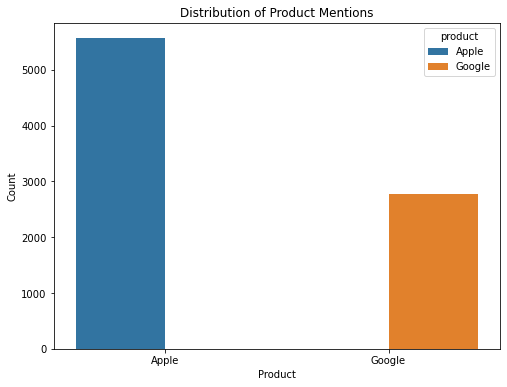

In [77]:
# Count plot for product (bar chart)

plt.figure(figsize = (8,6))
sns.countplot(data=df, x="product", hue = 'product')
plt.title('Distribution of Product Mentions')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

*Observation:* Apple is the most frequently mentioned product in the dataset, indicating a higher level of engagement compared to Google.

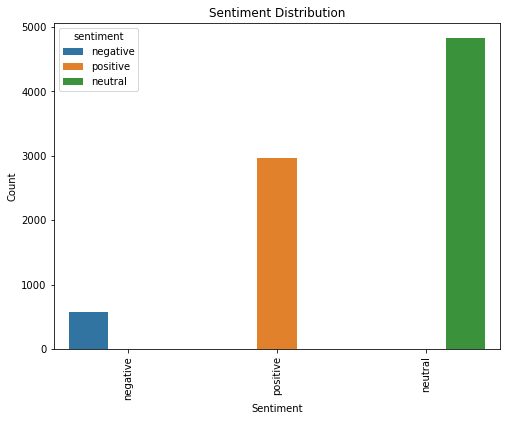

In [78]:
# Count plot for sentiment (bar chart)

# Mapping all sentiment labels to three categories
df['sentiment'] = df['sentiment'].replace({
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral',
    "I can't tell": 'neutral'
})

plt.figure(figsize = (8,6))
sns.countplot(data=df, x="sentiment", hue = 'sentiment')
plt.title('Sentiment Distribution')
plt.xticks(rotation=90)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

*Observation:* The dominant sentiment across the tweets is "No emotion toward the product", followed closely by positive emotion. This indicates that many users are mentioning products without expressing a clear sentiment.

### For text variable

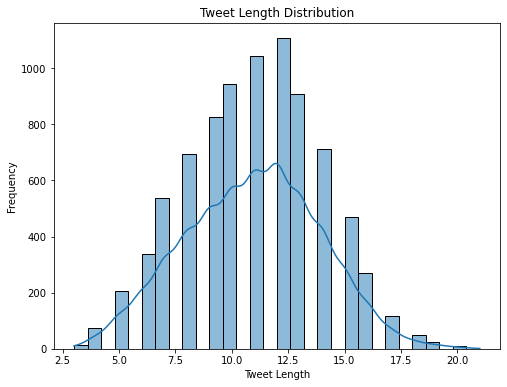

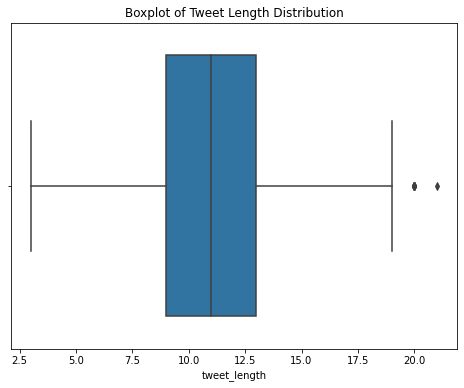

In [79]:
# Tweet length distribution
#Histogram
plt.figure(figsize = (8,6))
df['tweet_length'] = df['tokens'].apply(len)
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize = (8,6))
sns.boxplot(x=df['tweet_length'])
plt.title('Boxplot of Tweet Length Distribution')
plt.show()

*Observation:* Most tweets have a word count in the range of 10 to 13 tokens, indicating short user messages.

## Bivariate Analysis

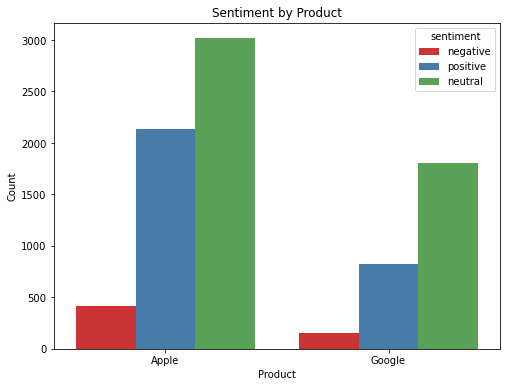

In [80]:
#Bivariate analysis between product vs sentiment

plt.figure(figsize = (8,6))
sns.countplot(data=df, x="product", hue="sentiment", palette="Set1")
plt.title('Sentiment by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

*Observation:* Apple-related tweets show the highest counts across all sentiment categories — including neutral, positive, and negative — suggesting that Apple not only receives the most attention but also the widest range of sentiment responses.

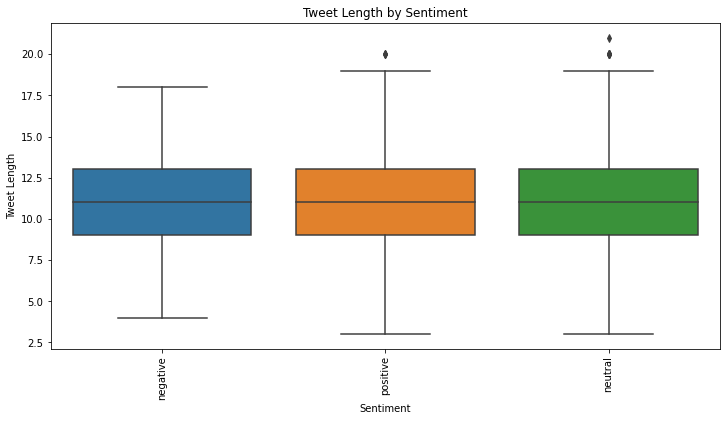

In [81]:
#Bivariate analysis between tweet length vs sentiment (Box plot)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sentiment', y='tweet_length')
plt.xticks(rotation=90)
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

*Observation:* The median tweet length is similar across all sentiment categories, meaning that the typical tweet length does not differ much by sentiment.“Positive emotion” and “Neutral” categories have a few longer tweets (outliers), which indicates that some tweets in those categories are unusually long compared to others.

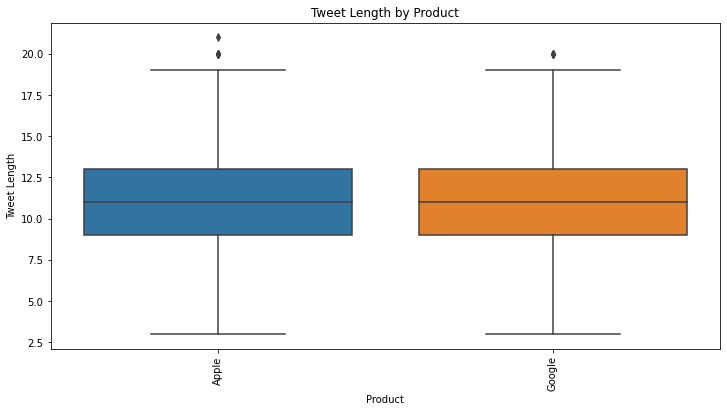

In [82]:
#Bivariate analysis between tweet length vs product (Box plot)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='product', y='tweet_length')
plt.xticks(rotation=90)
plt.title('Tweet Length by Product')
plt.xlabel('Product')
plt.ylabel('Tweet Length')
plt.show()

*Observation:* The median tweet length for Apple and Google tweets is very similar, suggesting that, on average, users write tweets of similar lengths when discussing either product. Both Apple and Google show a few longer tweets i.e. outliers above the top whisker, meaning that some tweets are unusually long for both brands.

## Multivariate Analysis

### Feature engineering

In [83]:
# Encode sentiment
sentiment_map = {
    'neutral': 0,
    'positive': 1,
    'negative': -1
}
df['sentiment_encoded'] = df['sentiment'].map(sentiment_map)

# Encode product
df['product_encoded'] = df['product'].astype('category').cat.codes

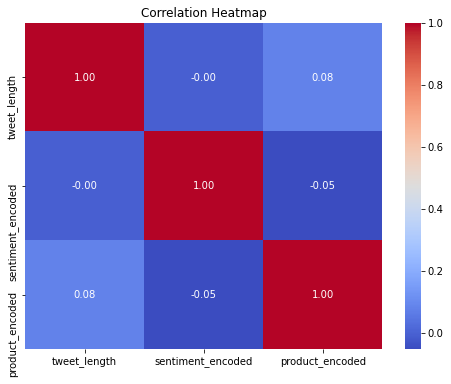

In [84]:
# Correlation heatmap
#Seeing how strongly variables are related.abs

numeric_cols = ['tweet_length', 'sentiment_encoded', 'product_encoded']
corr = df[numeric_cols].corr()

plt.figure(figsize = (8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

*Observation:* The correlation heatmap above suggests that there is no strong linear relationship between tweet length, sentiment, or product. The correlation between tweet_length and sentiment_encoded (–0.00) and between tweet_length and product_encoded (0.08) remain very close to zero, indicating that tweet length does not vary meaningfully with either sentiment or product type. Likewise, the weak negative correlation between sentiment_encoded and product_encoded (–0.05) suggests that the distribution of positive, neutral, and negative sentiments is fairly balanced across Apple and Google-related tweets. Overall, the findings confirm that tweet length, sentiment, and product are largely independent, showing no significant linear associations.